In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
#df = pd.read_excel(r'C:\Users\SAM HP\Desktop\Fb Camp Working\Social_FB.xlsx')
df = pd.read_excel('Social_FB.xlsx')

In [4]:
df.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,campaign_date,age,gender,interest,ad_region,spent,approved_conversion
0,708746,916,103916,2023-07-01 13:27:00,31,M,15,2,1.43,1
1,708749,916,103917,2023-07-01 13:27:00,32,M,16,5,1.82,0
2,708771,916,103920,2023-07-01 17:28:00,30,M,20,2,0.00,0
3,708815,916,103928,2023-07-02 05:14:00,33,M,28,3,1.25,0
4,708818,916,103928,2023-07-02 12:50:00,30,M,28,1,1.29,1


In [5]:
df.dtypes

ad_id                           int64
xyz_campaign_id                 int64
fb_campaign_id                  int64
campaign_date          datetime64[ns]
age                             int64
gender                         object
interest                        int64
ad_region                       int64
spent                         float64
approved_conversion             int64
dtype: object

In [6]:
df.isna().any()

ad_id                  False
xyz_campaign_id        False
fb_campaign_id         False
campaign_date          False
age                    False
gender                 False
interest               False
ad_region              False
spent                  False
approved_conversion    False
dtype: bool

In [7]:
X = df.drop(columns=['approved_conversion'])
y = df['approved_conversion']

In [8]:
X

,ad_id,xyz_campaign_id,fb_campaign_id,campaign_date,age,gender,interest,ad_region,spent
0,708746,916,103916,2023-07-01 13:27:00,31,M,15,2,1.430000
1,708749,916,103917,2023-07-01 13:27:00,32,M,16,5,1.820000
2,708771,916,103920,2023-07-01 17:28:00,30,M,20,2,0.000000
3,708815,916,103928,2023-07-02 05:14:00,33,M,28,3,1.250000
4,708818,916,103928,2023-07-02 12:50:00,30,M,28,1,1.290000
...,...,...,...,...,...,...,...,...,...
751,1121571,1178,144619,2024-02-26 12:40:00,40,M,2,1,74.830001
752,1121572,1178,144619,2024-02-26 20:40:00,43,M,2,2,7.480000
753,1121575,1178,144619,2024-02-27 01:13:00,44,M,2,1,36.480001
754,1121577,1178,144620,2024-02-27 12:25:00,41,M,7,6,68.060001


In [9]:
y

0      1
1      0
2      0
3      0
4      1
      ..
751    1
752    0
753    1
754    0
755    1
Name: approved_conversion, Length: 756, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
categorical_features = ['gender', 'ad_region']
categorical_features

['gender', 'ad_region']

In [12]:
categorical_features = [feature for feature in categorical_features if feature in X.columns]
categorical_features

['gender', 'ad_region']

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 ['gender', 'ad_region'])])

In [14]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['gender', 'ad_region'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [15]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['gender', 'ad_region'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [16]:
y_pred = pipeline.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [17]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 86.8421052631579


In [18]:
joblib.dump(pipeline, 'trained_pipeline_DT.pkl')

['trained_pipeline_DT.pkl']

# For Graph

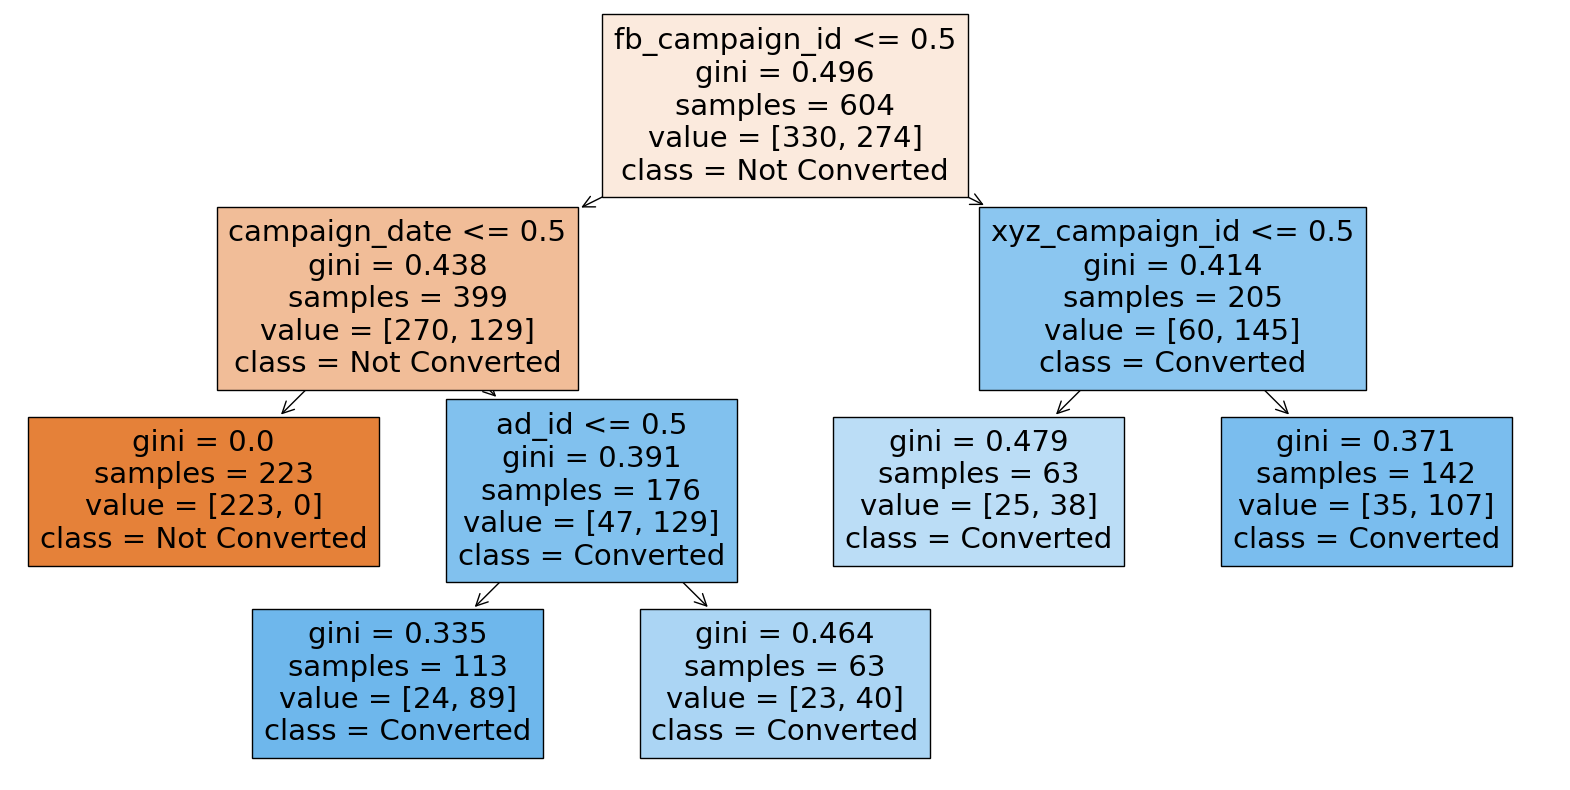

In [19]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(pipeline.named_steps['classifier'], feature_names=list(X.columns), class_names=['Not Converted', 'Converted'], filled=True)
plt.show()